<a href="https://colab.research.google.com/github/KristynaPijackova/Tutorials_NNs_and_signals/blob/main/%C5%98e%C5%A1en%C3%AD_Satellite_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛰 🌎 Klasifikace satelitních dat 🌍 🛰

V této úloze budeme mít za úkol klasifikovat snímky satelitních dat do 4 skupin:

*   cloudy - oblaka 🌩
*   desert - poušť 🏜
*   green area - zelená plocha 🌲
*   water - vodní plocha 🌊


Zdroj dat: https://www.kaggle.com/datasets/mahmoudreda55/satellite-image-classification

Data jsou také dostupná na: https://drive.google.com/file/d/17gFLVBWHBIk-Fy6dU61rCPgSxLoOGxxn/view?usp=sharing

⌨ Pár užitečných klávesových zkratek pro jednodušší ovládání Jupyter Notebooku ⌨

Spuštění buňky: `shift + enter`

Vložení nové buňky nad: `ctrl + m a`

Vložení nové buňky pod: `ctrl + m b`

Vytvoření textové buňky (z již existující) `ctrl + m m`

Najdi a nahraď: `ctrl + h`

Smazání buňky: `ctrl + m d`

Vrácení poslední akce s buňkou `ctrl + m z` (např. potom, co jste ji omylem smazali...)


## 1 Stažení dat ⬇

Ke stažení dat využijeme příkaz `!gdown` kterým lze v Google Colabu stáhnout data umístněná v zipové složce do lokální paměti notebooku. K tomuto využijeme sdílecí link na data a část která se nachází mezi /d/ a /view...

In [ ]:
!gdown 1LHBfc5FmaEQqVR9leufWTGq9LWjiKjkU  # data sorted into train-test folders

Downloading...
From: https://drive.google.com/uc?id=1LHBfc5FmaEQqVR9leufWTGq9LWjiKjkU
To: /content/data_sorted.zip
100% 23.2M/23.2M [00:00<00:00, 31.3MB/s]


Pokud rozklikneme složku s daty uložené  v lokální paměti Jupyter Notebooku (po levé straně) se symbolem 📁, můžeme vidět, že se nám zde objevila zazipovaná složka **data_satellite.zip**. Tuto složku můžeme rozbalit pomocí příkazu `!unzip nazev_souboru.zip`



In [ ]:
!unzip data_sorted.zip

Streaming output truncated to the last 5000 lines.
  inflating: data_sorted/train/green_area/Forest_2933.jpg  
  inflating: data_sorted/train/green_area/Forest_796.jpg  
  inflating: data_sorted/train/green_area/Forest_78.jpg  
  inflating: data_sorted/train/green_area/Forest_668.jpg  
  inflating: data_sorted/train/green_area/Forest_836.jpg  
  inflating: data_sorted/train/green_area/Forest_2199.jpg  
  inflating: data_sorted/train/green_area/Forest_780.jpg  
  inflating: data_sorted/train/green_area/Forest_318.jpg  
  inflating: data_sorted/train/green_area/Forest_2995.jpg  
  inflating: data_sorted/train/green_area/Forest_23.jpg  
  inflating: data_sorted/train/green_area/Forest_2982.jpg  
  inflating: data_sorted/train/green_area/Forest_774.jpg  
  inflating: data_sorted/train/green_area/Forest_2911.jpg  
  inflating: data_sorted/train/green_area/Forest_750.jpg  
  inflating: data_sorted/train/green_area/Forest_701.jpg  
  inflating: data_sorted/train/green_area/Forest_2259.jpg  
 

## 2 Import knihoven, které budeme používat 📚

In [ ]:
import os
import numpy as np
import pandas as pd
import math
import itertools

from matplotlib import pyplot as plt
from PIL import Image

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model


## 3 Načtení dat 🖼

In [ ]:
train_data_dir = '/content/data_sorted/train'
test_data_dir = '/content/data_sorted/test'
classes = ['oblaka', 'poušť', 'zelená plocha', 'vodní plocha']

In [ ]:
img_size = 128

# TRAIN AND VALIDATION DATA

# create a data generator for image augmentation
datagen_train = ImageDataGenerator(
        samplewise_center=False,  # set each sample mean to 0
        rotation_range=180,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1,  # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images horizontally
        vertical_flip=True,  # randomply flip image vertically
        rescale=1./255,  #scale images
        validation_split=0.2  # split data
        )

# TEST DATA

# create a data generator without image augmentation
datagen_test = ImageDataGenerator(
        samplewise_center=False,  # set each sample mean to 0
        rescale=1./255,  #scale images
        )

In [ ]:
#create training set from folders
train_data = datagen_train.flow_from_directory(train_data_dir,
                                             target_size=(img_size, img_size),
                                             batch_size=32,
                                             class_mode='categorical',
                                             shuffle=True,
                                             subset='training')

#create validation set
validation_data = datagen_train.flow_from_directory(train_data_dir,
                                            target_size=(img_size, img_size),
                                            batch_size=1,
                                            class_mode='categorical',
                                            shuffle=True,
                                            subset='validation')




#create test set
test_data = datagen_test.flow_from_directory(test_data_dir,
                                            target_size=(img_size, img_size),
                                            batch_size=32,
                                            class_mode='categorical',
                                            shuffle=False,
                                            )


Found 3595 images belonging to 4 classes.
Found 897 images belonging to 4 classes.
Found 1123 images belonging to 4 classes.


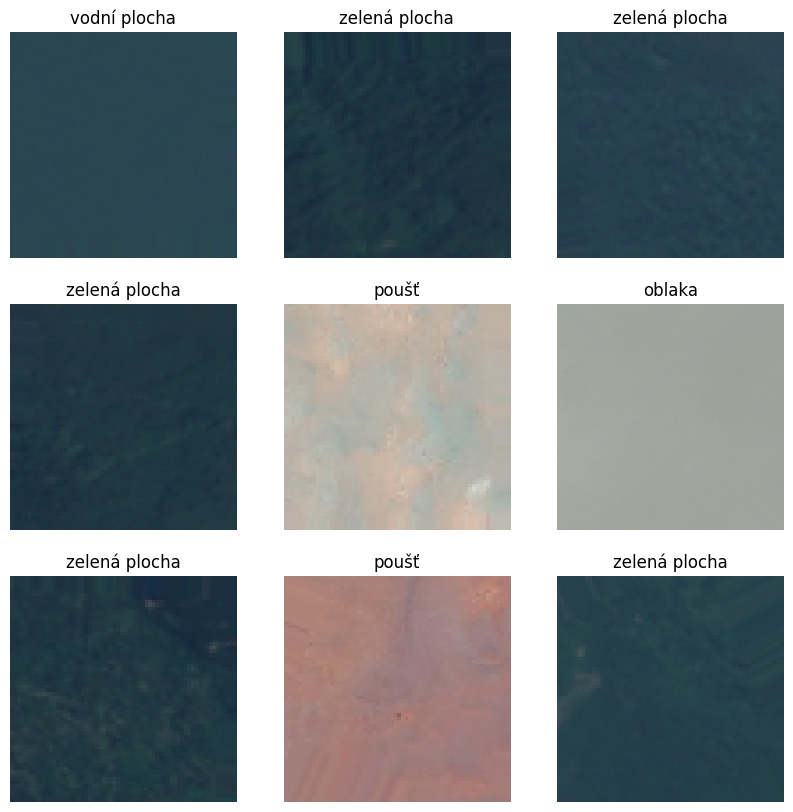

In [ ]:
image_batch, labels_batch = train_data.next()

plt.figure(figsize=(10, 10))
for i, image in enumerate(image_batch):
    if i < 9:
        plt.subplot(331 + i)
        plt.imshow(image)
        plt.title(classes[np.argmax(labels_batch[i])])
    plt.axis('off')

## 4 Vytvoření modelu konvoluční sítě 🖥

Pro naši úlohu budeme používat tradiční konvoluční síť, tedy síť, která se skládá z konvolučních a poolingových vrstev, na které jsou pak navázány plně spojené vrstvy.

K "výstavbě" modelu použijeme třídu Sequential() (https://keras.io/guides/sequential_model/), která nám tyto vrstvy seskládá za sebou.

In [ ]:
model = Sequential()
model.add(Conv2D(256, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

Definice callbacků a optimizerů (dobrovolné):

In [ ]:
model_callback = keras.callbacks.ModelCheckpoint("cnn_model.h5", save_best_only=True, monitor="val_loss")

In [ ]:
model_optimizer = keras.optimizers.Adam(learning_rate=0.001)

Kompilace modelu:

In [ ]:
model.compile(optimizer=model_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

Přehled modelu:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 256)      1024      
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                        

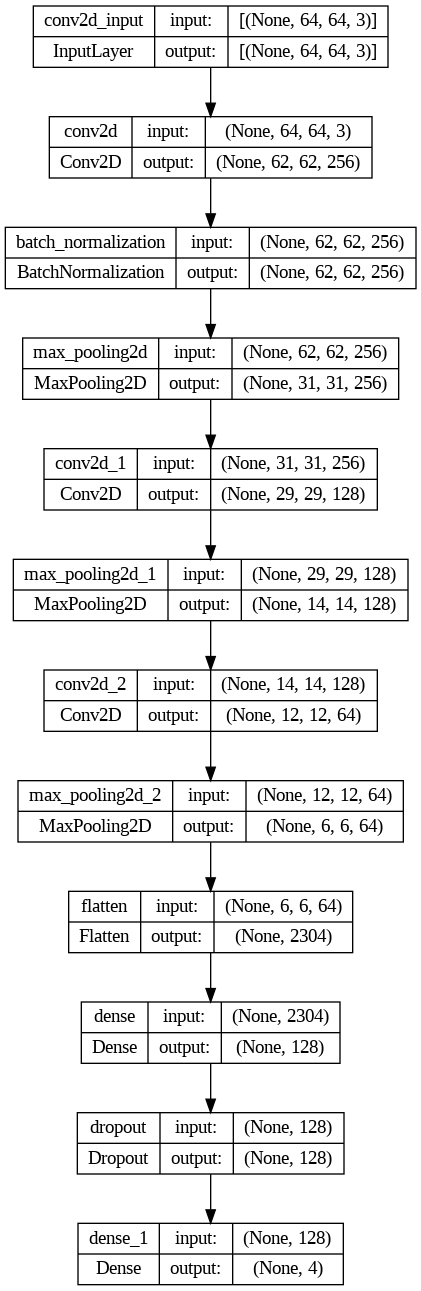

In [ ]:
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)
display(Image.open('cnn_model.png'))

Trénink:

In [ ]:
history = model.fit(train_data, epochs=20, validation_data=validation_data, callbacks=model_callback)

Epoch 1/20
113/113 [==============================] - 37s 178ms/step - loss: 0.5979 - accuracy: 0.7488 - val_loss: 1.1559 - val_accuracy: 0.4771
Epoch 2/20
113/113 [==============================] - 22s 194ms/step - loss: 0.4698 - accuracy: 0.8111 - val_loss: 1.3689 - val_accuracy: 0.6009
Epoch 3/20
113/113 [==============================] - 19s 169ms/step - loss: 0.3785 - accuracy: 0.8581 - val_loss: 0.8479 - val_accuracy: 0.6210
Epoch 4/20
113/113 [==============================] - 17s 154ms/step - loss: 0.3967 - accuracy: 0.8439 - val_loss: 0.6664 - val_accuracy: 0.7625
Epoch 5/20
113/113 [==============================] - 17s 152ms/step - loss: 0.3762 - accuracy: 0.8515 - val_loss: 0.3693 - val_accuracy: 0.8395
Epoch 6/20
113/113 [==============================] - 14s 128ms/step - loss: 0.3288 - accuracy: 0.8751 - val_loss: 1.1321 - val_accuracy: 0.7347
Epoch 7/20
113/113 [==============================] - 19s 168ms/step - loss: 0.3276 - accuracy: 0.8698 - val_loss: 0.3159 - val_ac

Rychlá evaluace výsledků:

In [ ]:
print('Train Score:\n')
train_score = model.evaluate(train_data)

print('Validation Score:\n')
validation_score = model.evaluate(validation_data)

print('Test Score:\n')
test_score = model.evaluate(test_data)

Train Score:

113/113 [==============================] - 12s 103ms/step - loss: 0.2465 - accuracy: 0.9104
Validation Score:

897/897 [==============================] - 5s 6ms/step - loss: 0.2434 - accuracy: 0.9075
Test Score:

36/36 [==============================] - 1s 39ms/step - loss: 0.2286 - accuracy: 0.9154


Zobrazení průběhu výsledků (loss + accuracy) během tréninku:

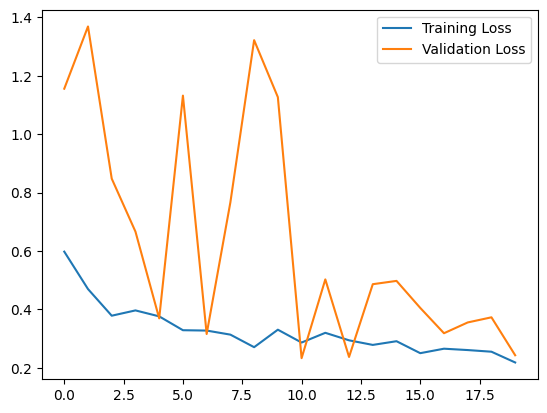

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

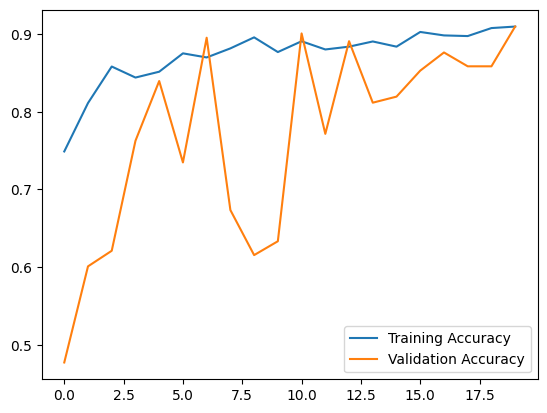

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

## ⬇🔄 Uložení a načtení uloženého modelu ⬇🔄

In [ ]:
model.save("vlastni_cnn_model")

In [ ]:
loaded_model = tf.keras.models.load_model("vlastni_cnn_model")

## 5 Predikce dat z natrénovaného obrázku 🖼❓

### 5.1 Predikce na části dat (na ukázku jak vypadají labely a data z dataloaderu)

Načteme si část náhodných dat z našeho datasetu pomoct `.next()`

In [ ]:
image_batch, labels_batch = train_data.next()

In [ ]:
labels_batch

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]], dtype=float32)

Pro predikci použijeme `.predict()`

In [ ]:
predictions = model.predict(image_batch)

1/1 [==============================] - 1s 824ms/step


In [ ]:
print(f'Predikce na náhodném segmentu dat:\n\n {predictions} \n\nTvar predikovaných vektorů:\n {predictions.shape}' )


Predikce na náhodném segmentu dat:

 [[0.29212248 0.1588274  0.32196054 0.22708955]
 [0.29047263 0.1736575  0.19310576 0.3427641 ]
 [0.40808132 0.14400184 0.33925158 0.10866528]
 [0.36827362 0.23869795 0.21386588 0.17916253]
 [0.33087027 0.13862325 0.36362886 0.16687758]
 [0.34013346 0.18534017 0.20756239 0.26696405]
 [0.3142564  0.2651704  0.22797005 0.19260314]
 [0.3183894  0.14890765 0.3687638  0.16393921]
 [0.3584125  0.19659862 0.2470436  0.19794531]
 [0.30795482 0.06695746 0.2841155  0.34097221]
 [0.31090593 0.15452905 0.30965924 0.22490576]
 [0.3494446  0.18327394 0.2801147  0.18716677]
 [0.27286178 0.16465518 0.3228764  0.23960656]
 [0.37373638 0.04957662 0.31379327 0.2628937 ]
 [0.2831973  0.17301518 0.34579563 0.19799183]
 [0.31623107 0.16893832 0.27970603 0.23512456]
 [0.30435714 0.16300689 0.2623585  0.2702775 ]
 [0.36108303 0.18175274 0.19977732 0.2573869 ]
 [0.26751468 0.09580701 0.3027685  0.33390987]
 [0.26673084 0.07457995 0.19509006 0.46359912]
 [0.27287665 0.16265032

Jak můžeme vidět, bylo načteno 32 obrázků, na kterých proběhla predikce. Výstup predikce je pak vektor 4 čísel, jejichž nejvyšší hodnota odpovídá nejpravděpodobnější hodnotě - proto si ji musíme zjistit.

Toto můžeme udělat pomocí funkce `argmax()`, kterou najdeme v knihovně numpy

In [ ]:
actual_labels = np.argmax(labels_batch, axis=1)
predicted_labels = np.argmax(predictions, axis=1)

actual_labels, predicted_labels

(array([3, 0, 1, 2, 3, 2, 1, 1, 0, 2, 3, 2, 3, 2, 0, 3, 3, 0, 1, 0, 1, 0,
        0, 2, 0, 0, 2, 1, 1, 1, 2, 1]),
 array([2, 3, 0, 0, 2, 0, 0, 2, 0, 3, 0, 0, 2, 0, 2, 0, 0, 0, 3, 3, 2, 3,
        0, 0, 2, 0, 2, 0, 2, 2, 0, 2]))

In [ ]:
actual_class = [classes[lbl] for lbl in actual_labels]
actual_class

['vodní plocha',
 'oblaka',
 'poušť',
 'zelená plocha',
 'vodní plocha',
 'zelená plocha',
 'poušť',
 'poušť',
 'oblaka',
 'zelená plocha',
 'vodní plocha',
 'zelená plocha',
 'vodní plocha',
 'zelená plocha',
 'oblaka',
 'vodní plocha',
 'vodní plocha',
 'oblaka',
 'poušť',
 'oblaka',
 'poušť',
 'oblaka',
 'oblaka',
 'zelená plocha',
 'oblaka',
 'oblaka',
 'zelená plocha',
 'poušť',
 'poušť',
 'poušť',
 'zelená plocha',
 'poušť']

In [ ]:
predicted_class = [classes[lbl] for lbl in predicted_labels]
actual_class

['vodní plocha',
 'oblaka',
 'poušť',
 'zelená plocha',
 'vodní plocha',
 'zelená plocha',
 'poušť',
 'poušť',
 'oblaka',
 'zelená plocha',
 'vodní plocha',
 'zelená plocha',
 'vodní plocha',
 'zelená plocha',
 'oblaka',
 'vodní plocha',
 'vodní plocha',
 'oblaka',
 'poušť',
 'oblaka',
 'poušť',
 'oblaka',
 'oblaka',
 'zelená plocha',
 'oblaka',
 'oblaka',
 'zelená plocha',
 'poušť',
 'poušť',
 'poušť',
 'zelená plocha',
 'poušť']

### 5.2 Predikce dat, které máme načtené v našem testovacím datasetu

In [ ]:
predictions = model.predict(test_data)

36/36 [==============================] - 97s 3s/step


In [ ]:
actual_labels = test_data.classes

predicted_labels = np.argmax(predictions, axis=1)

In [ ]:
actual_labels, predicted_labels

(array([0, 0, 0, ..., 3, 3, 3], dtype=int32), array([0, 2, 3, ..., 0, 0, 2]))

Přehled počtu správně/chybně predikovaných dat pomocí konfusní matice:

In [ ]:
cm = confusion_matrix(actual_labels, predicted_labels)

In [ ]:
cm

array([[182,   0,  64,  39],
       [ 91,   0, 138,   4],
       [225,   0,  94,   6],
       [ 75,   1, 187,  17]])

Vizualizace konfusní matice:

In [ ]:
# Confusion matrix
def plot_cm(cm, classes):
    # Plot the confusion matrix as an image
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()

    # Add the class labels to the plot
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Add values to the plot
    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black")

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

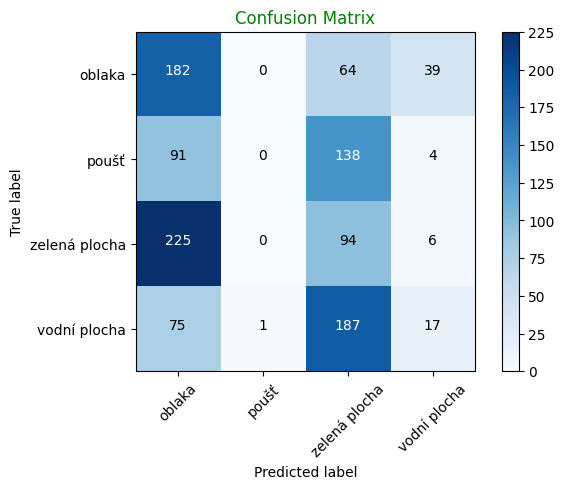

In [ ]:
plot_cm(cm, classes)

### 5.3 Predikce nových dat, které nemáme načtené v dataloaderu:

In [ ]:
# Quiz data
!gdown 12-XT4gFWL8E-FXWw71z27ysskC-zhIZ0
!unzip quiz_data.zip

Downloading...
From: https://drive.google.com/uc?id=12-XT4gFWL8E-FXWw71z27ysskC-zhIZ0
To: /content/quiz_data.zip
100% 262k/262k [00:00<00:00, 121MB/s]
Archive:  quiz_data.zip
replace quiz_data/14_02.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
data_dir = '/content/quiz_data'

img_arrays = []
labels = []

for img in sorted(os.listdir(data_dir)):
    img_path = os.path.join(data_dir, img)
    k_img = keras.preprocessing.image.load_img(img_path)
    image_arr = keras.preprocessing.image.img_to_array(k_img)
    image_arr = tf.image.resize(image_arr,(img_size, img_size)).numpy()/255.
    image_arr = tf.expand_dims(image_arr, axis=0)
    img_arrays.append(image_arr)
    labels.append(int(img[3:5]))


In [ ]:
img_arrays[0], img_arrays[0].shape

(<tf.Tensor: shape=(1, 128, 128, 3), dtype=float32, numpy=
 array([[[[0.15686275, 0.22144608, 0.2841912 ],
          [0.15686275, 0.22144608, 0.2841912 ],
          [0.15686275, 0.22256912, 0.28531423],
          ...,
          [0.16470589, 0.22745098, 0.2901961 ],
          [0.16470589, 0.22745098, 0.2901961 ],
          [0.16380112, 0.22654623, 0.28929132]],
 
         [[0.15686275, 0.22352941, 0.28627452],
          [0.15686275, 0.22352941, 0.28627452],
          [0.15971105, 0.22512256, 0.28786764],
          ...,
          [0.16470589, 0.22745098, 0.2901961 ],
          [0.16470589, 0.22745098, 0.2901961 ],
          [0.16078432, 0.22352941, 0.28627452]],
 
         [[0.15686275, 0.22352941, 0.28627452],
          [0.15686275, 0.22352941, 0.28627452],
          [0.15825003, 0.22491671, 0.2876618 ],
          ...,
          [0.16532725, 0.22879902, 0.2915441 ],
          [0.16470589, 0.22745098, 0.2901961 ],
          [0.16078432, 0.22352941, 0.28627452]],
 
         ...,
 
       

In [ ]:
image_batch[0], image_batch[0].shape

(array([[[0.32156864, 0.43529415, 0.45882356],
         [0.3229534 , 0.4366789 , 0.4602083 ],
         [0.3245546 , 0.44015133, 0.46274513],
         ...,
         [0.3237883 , 0.4498706 , 0.48065105],
         [0.3208923 , 0.45165676, 0.4770787 ],
         [0.31910613, 0.45344296, 0.47350633]],
 
        [[0.32156864, 0.43529415, 0.45898652],
         [0.32156864, 0.43529415, 0.45882356],
         [0.32451048, 0.43823597, 0.46176538],
         ...,
         [0.31895489, 0.45359418, 0.4732039 ],
         [0.3171687 , 0.4544236 , 0.47010988],
         [0.3153825 , 0.45263743, 0.4683237 ]],
 
        [[0.32156864, 0.43529415, 0.46281725],
         [0.32156864, 0.43529415, 0.45882356],
         [0.32259512, 0.4363206 , 0.45985   ],
         ...,
         [0.3152313 , 0.4524862 , 0.46817246],
         [0.3137255 , 0.45041963, 0.4663863 ],
         [0.3137255 , 0.4468473 , 0.46460012]],
 
        ...,
 
        [[0.32214347, 0.43921572, 0.46943867],
         [0.32278004, 0.44042712, 0.47179

In [ ]:
preds = []
lbls =  []
for x, y in zip(img_arrays, labels):
    predictions = model.predict(x)
    predicted_labels = np.argmax(predictions, axis=1)
    preds.extend(list(predicted_labels))
    lbls.extend(list([y]))



1/1 [==============================] - 0s 22ms/step


In [ ]:
preds, lbls

([2, 1, 0, 1, 2, 3, 2, 0, 1, 2, 0, 0, 3, 2, 1, 0],
 [3, 1, 0, 1, 2, 3, 2, 0, 1, 2, 0, 3, 3, 2, 1, 0])

In [ ]:
cm = confusion_matrix(lbls, preds)

In [ ]:
cm

array([[4, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 4, 0],
       [1, 0, 1, 2]])

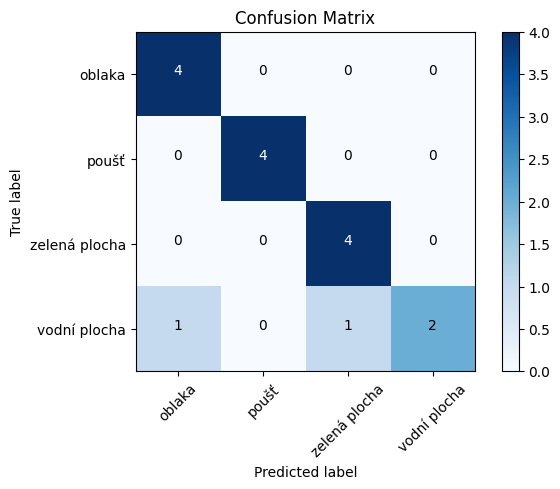

In [ ]:
plot_cm(cm, classes)

🧑 vs. 🖥 Pojďmě se podívat kdo líp zvládá klasifikovat satelitní obrázky... 🧑 vs. 🖥

**Jsi to ty nebo tvůj deep learningový model? 🤔**


Dřív než spustíme predikci modelu a podíváme se co u jednotlivých obrázků předpověděl, pojď zkusit, jak by jsi obrázky ohodnotil/a ty...

🖋 [Google formulář s kvízem](https://forms.gle/Y6LFrPjo91Hhjs7G8)

(https://forms.gle/Y6LFrPjo91Hhjs7G8)

A teď se můžeme podívat, co nám pro který obrázek předpověděl náš model 🤔

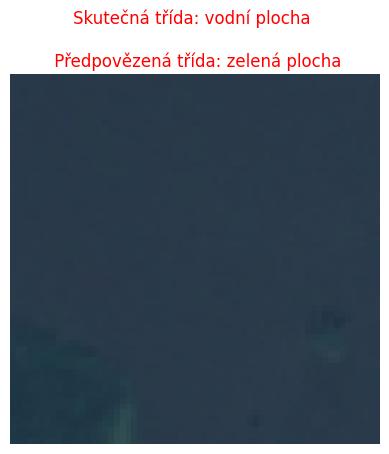

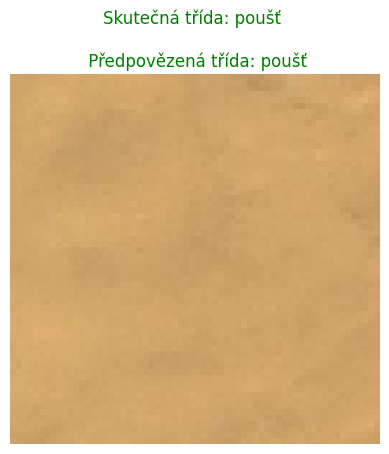

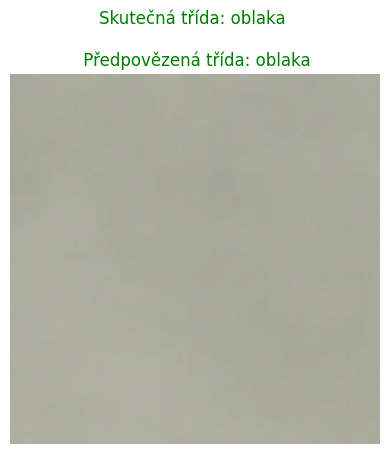

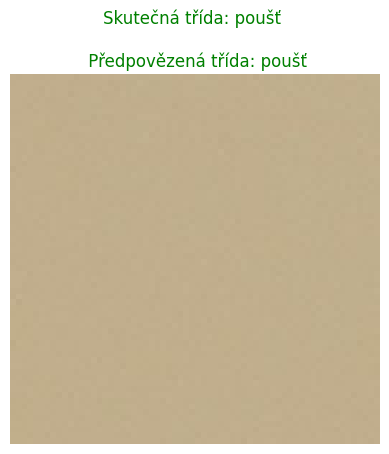

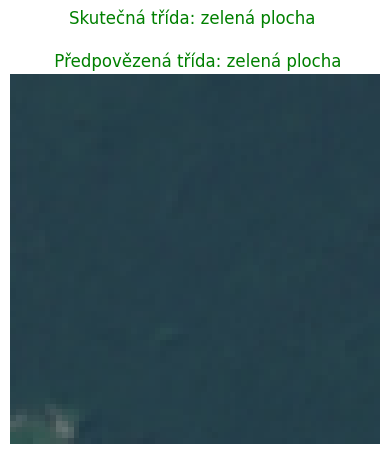

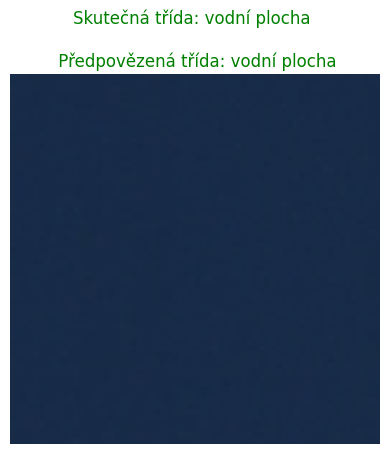

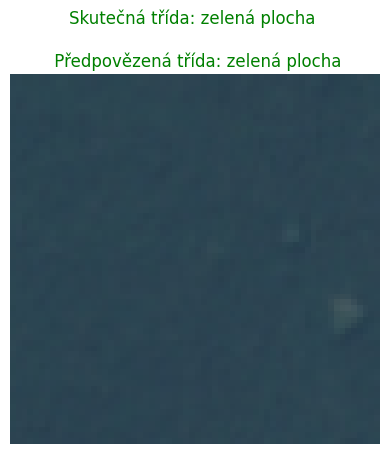

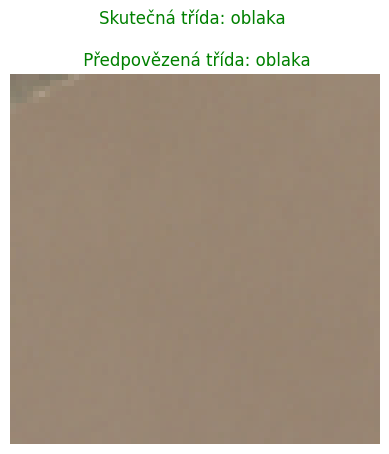

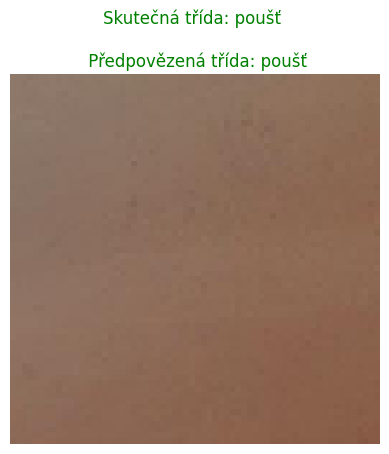

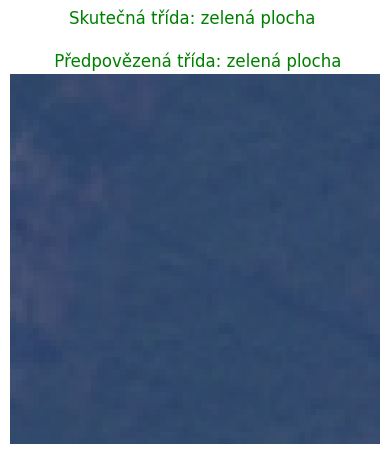

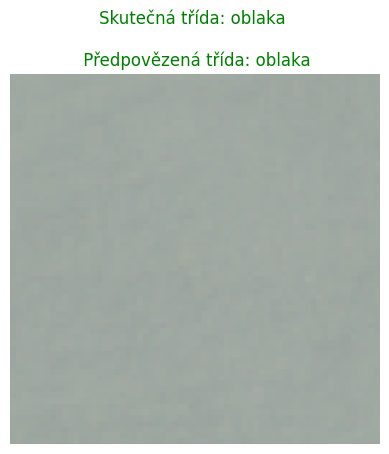

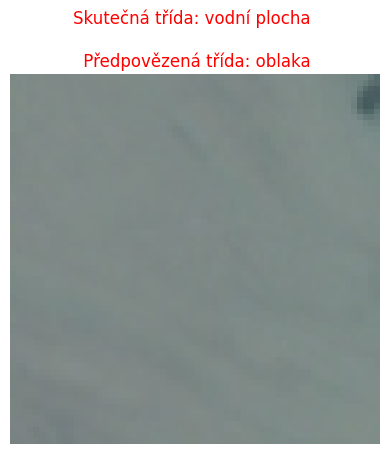

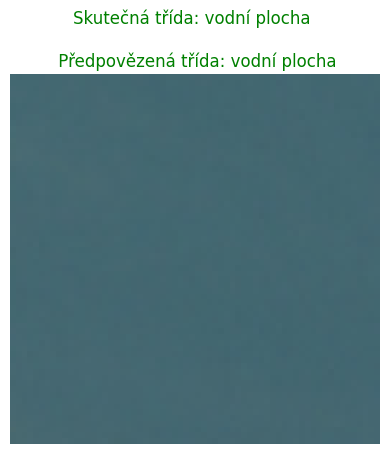

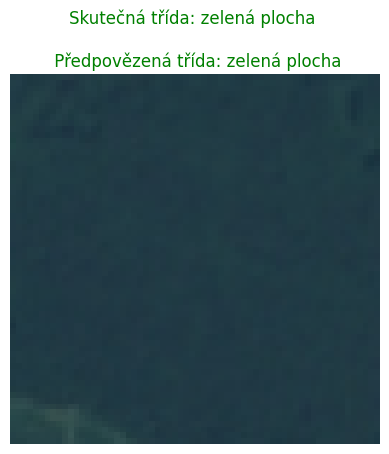

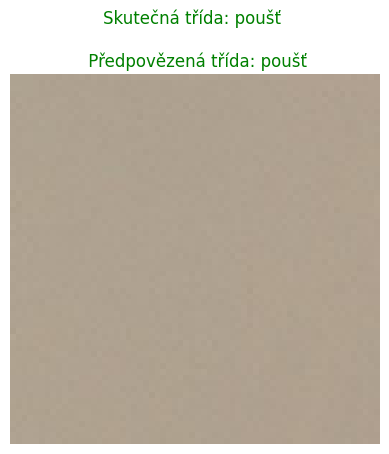

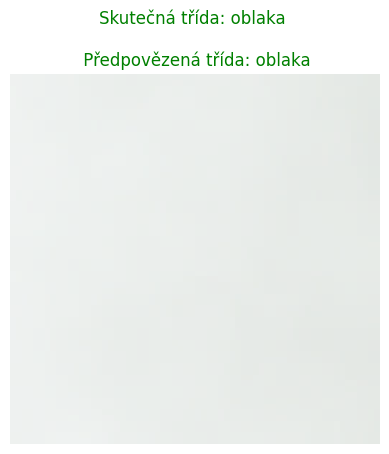

In [ ]:
for i, img in enumerate(img_arrays):

    if lbls[i] == preds[i]:
        params = {"text.color" : "green"}
        plt.rcParams.update(params)
    else:
        params = {"text.color" : "red"}
        plt.rcParams.update(params)

    plt.axis('off')
    plt.imshow(img[0, :, :, :])
    plt.title(f'Skutečná třída: {classes[lbls[i]]} \n\n Předpovězená třída: {classes[preds[i]]}')
    plt.show()
    print('\n')


## 6 Trénink s předtrénovaným modelem 🏋

Pro úlohy na obrazové data je vhodné používat již [předtrénované modely](https://keras.io/api/applications/), které jsou dostupné online. Tyto modely jsou většinou předtrénované na [datasetu Imagenet](https://www.image-net.org/), který obsahuje velkou kolekci obrazových dat s 1000 kategoriemi.

Pro naše použití pak využijeme metody "[transfer learning](https://machinelearningmastery.com/transfer-learning-for-deep-learning/)", tedy přeneseného učení, kdy zmrazíme tělo námi vybraného modelu (část s konvolučními vrstvami) a implementujeme a "pouze" dotrénovávámě "hlavu" sítě (část s plně spojenými vrstvami).

Tuto úlohu si vyzkoušíme v dalším kroku k porovnání s naší jednoduchou konvoluční sítí.

Stažení modelu:

In [ ]:
base_model = keras.applications.ResNet50V2(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(img_size, img_size, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

base_model.trainable = False
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_20 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_20[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 66, 66, 64)   0           ['conv1_conv[0][0]']    

Vytvoření "hlavy" klasifikátoru a spojení s baseline modelem:

In [ ]:
inputs = tf.keras.Input(shape=(img_size, img_size, 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.35)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(62, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(len(classes), activation='softmax')(x)
resnet_model = tf.keras.Model(inputs, x)

In [ ]:
resnet_model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, 4, 4, 2048)        23564800  
                                                                 
 global_average_pooling2d_10  (None, 2048)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_33 (Dropout)        (None, 2048)              0         
                                                                 
 dense_37 (Dense)            (None, 128)               262272    
                                                                 
 dropout_34 (Dropout)        (None, 128)               0         
                                                           

Definice callbacků a optimizerů (dobrovolné):

In [ ]:
model_callback = [keras.callbacks.ModelCheckpoint("resnet_model.h5", save_best_only=True, monitor="val_loss"),
                  keras.callbacks.EarlyStopping(monitor='val_loss', patience=8),
                  keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=5)]

In [ ]:
model_optimizer = keras.optimizers.Adam(learning_rate=0.0007)

Kompilace modelu:

In [ ]:
resnet_model.compile(optimizer=model_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

Přehled modelu:

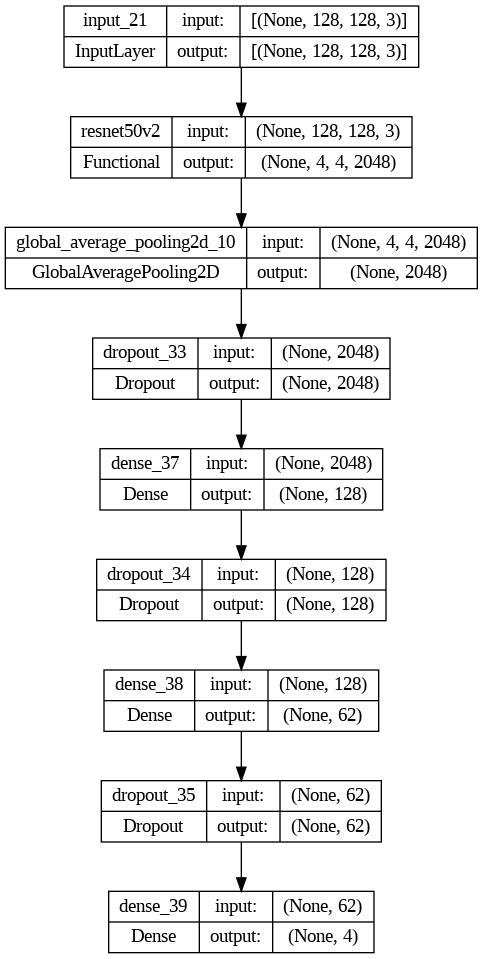

In [ ]:
plot_model(resnet_model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)
display(Image.open('cnn_model.png'))

Trénink:

In [ ]:
resnet_history = resnet_model.fit(train_data, epochs=20, validation_data=validation_data, callbacks=model_callback)

Epoch 1/20
113/113 [==============================] - 42s 341ms/step - loss: 0.6579 - accuracy: 0.7544 - val_loss: 0.2098 - val_accuracy: 0.9365 - lr: 7.0000e-04
Epoch 2/20
113/113 [==============================] - 37s 326ms/step - loss: 0.2947 - accuracy: 0.9024 - val_loss: 0.1828 - val_accuracy: 0.9376 - lr: 7.0000e-04
Epoch 3/20
113/113 [==============================] - 46s 413ms/step - loss: 0.2393 - accuracy: 0.9196 - val_loss: 0.1918 - val_accuracy: 0.9275 - lr: 7.0000e-04
Epoch 4/20
113/113 [==============================] - 31s 274ms/step - loss: 0.2132 - accuracy: 0.9271 - val_loss: 0.1552 - val_accuracy: 0.9454 - lr: 7.0000e-04
Epoch 5/20
113/113 [==============================] - 29s 258ms/step - loss: 0.1802 - accuracy: 0.9382 - val_loss: 0.1658 - val_accuracy: 0.9431 - lr: 7.0000e-04
Epoch 6/20
113/113 [==============================] - 30s 269ms/step - loss: 0.1675 - accuracy: 0.9444 - val_loss: 0.1740 - val_accuracy: 0.9420 - lr: 7.0000e-04
Epoch 7/20
113/113 [========

Rychlá evaluace výsledků:

In [ ]:
print('Train Score:\n')
train_score = resnet_model.evaluate(train_data)

print('Validation Score:\n')
validation_score = resnet_model.evaluate(validation_data)

print('Test Score:\n')
test_score = resnet_model.evaluate(test_data)

Zobrazení průběhu výsledků (loss + accuracy) během tréninku:

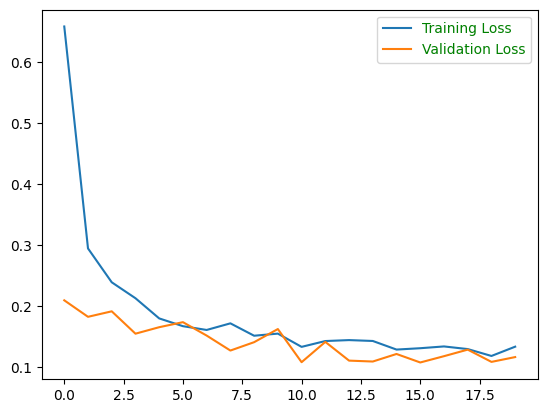

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(resnet_history.history['loss'], label='Training Loss')
plt.plot(resnet_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

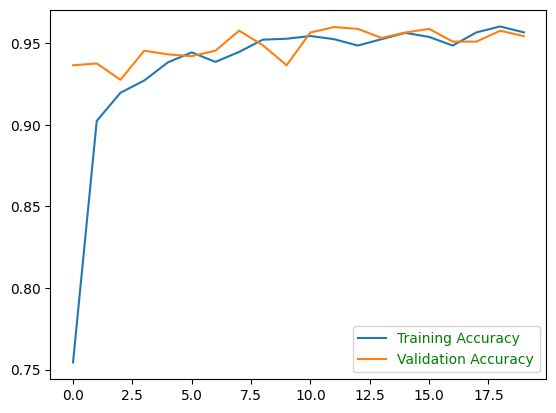

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(resnet_history.history['accuracy'], label='Training Accuracy')
plt.plot(resnet_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

## 7 Predikce dat s předtrénovaným modelem

### 7.1  Predikce dat, které máme načtené v našem testovacím datasetu

In [ ]:
predictions = resnet_model.predict(test_data)

36/36 [==============================] - 3s 49ms/step


In [ ]:
actual_labels = test_data.classes

predicted_labels = np.argmax(predictions, axis=1)

In [ ]:
actual_labels, predicted_labels

(array([0, 0, 0, ..., 3, 3, 3], dtype=int32), array([0, 1, 0, ..., 3, 3, 3]))

Přehled počtu správně/chybně predikovaných dat pomocí konfusní matice:

In [ ]:
cm = confusion_matrix(actual_labels, predicted_labels)

In [ ]:
cm

array([[272,   8,   1,   4],
       [  4, 229,   0,   0],
       [  0,   0, 317,   8],
       [  2,   0,   9, 269]])

Vizualizace konfusní matice:

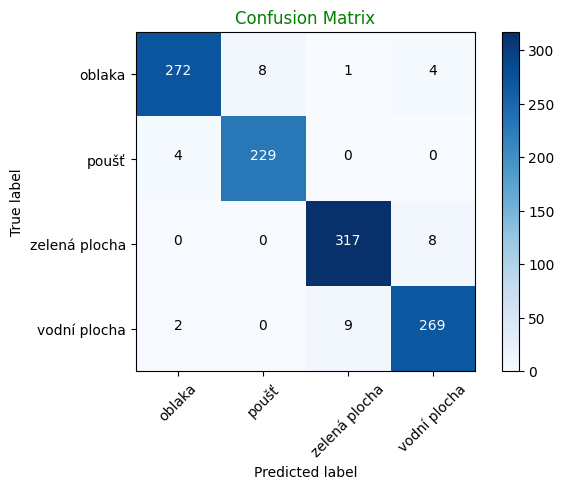

In [ ]:
plot_cm(cm, classes)

### 7.2 Predikce nových dat, které nemáme načtené v dataloaderu:

In [ ]:
preds = []
lbls =  []
for x, y in zip(img_arrays, labels):
    predictions = resnet_model.predict(x)
    predicted_labels = np.argmax(predictions, axis=1)
    preds.extend(list(predicted_labels))
    lbls.extend(list([y]))



1/1 [==============================] - 0s 26ms/step


In [ ]:
preds, lbls

([3, 1, 0, 1, 2, 3, 3, 0, 3, 2, 0, 3, 3, 2, 1, 0],
 [3, 1, 0, 1, 2, 3, 2, 0, 1, 2, 0, 3, 3, 2, 1, 0])

In [ ]:
cm = confusion_matrix(lbls, preds)
cm

array([[4, 0, 0, 0],
       [0, 3, 0, 1],
       [0, 0, 3, 1],
       [0, 0, 0, 4]])

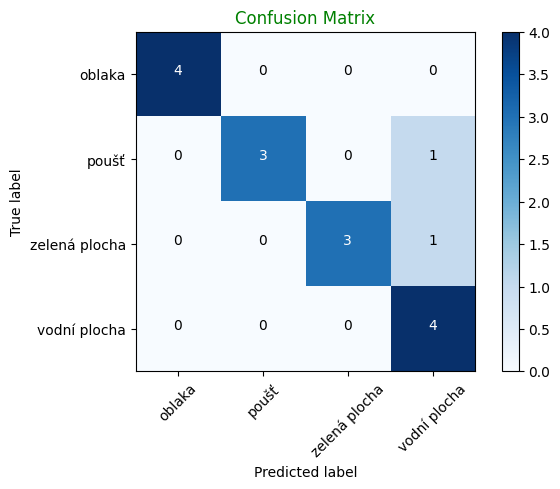

In [ ]:
plot_cm(cm, classes)

🧑 vs. 🖥 Pojďmě se podívat kdo líp zvládá klasifikovat satelitní obrázky... 🧑 vs. 🖥

**Jsi to ty nebo tvůj deep learningový model? 🤔**


Dřív než spustíme predikci modelu a podíváme se co u jednotlivých obrázků předpověděl, pojď zkusit, jak by jsi obrázky ohodnotil/a ty...

🖋 [Google formulář s kvízem](https://forms.gle/Y6LFrPjo91Hhjs7G8)

(https://forms.gle/Y6LFrPjo91Hhjs7G8)

A teď se můžeme podívat, co nám pro který obrázek předpověděl náš model 🤔

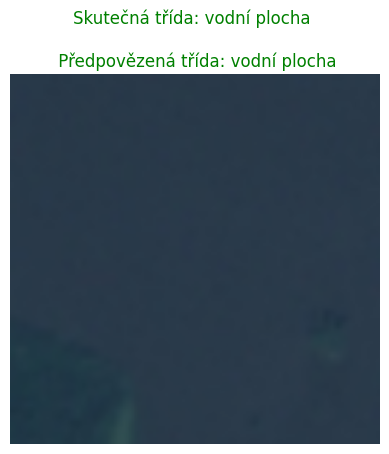

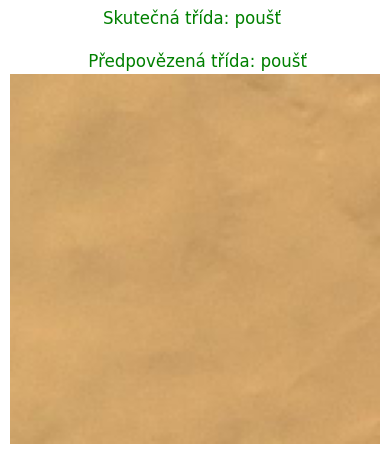

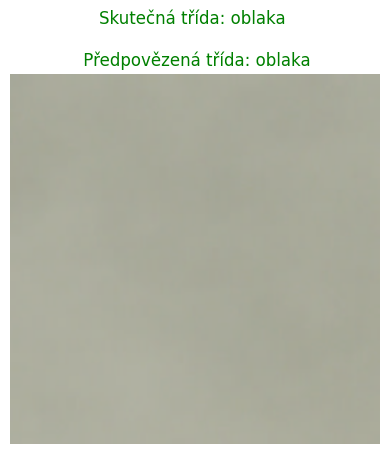

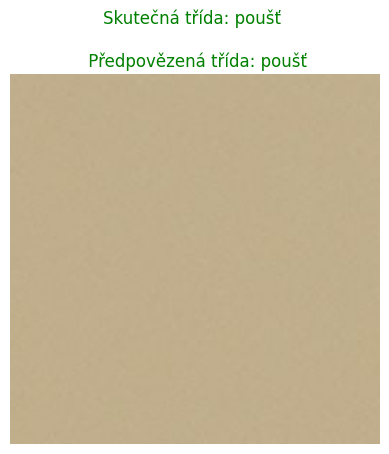

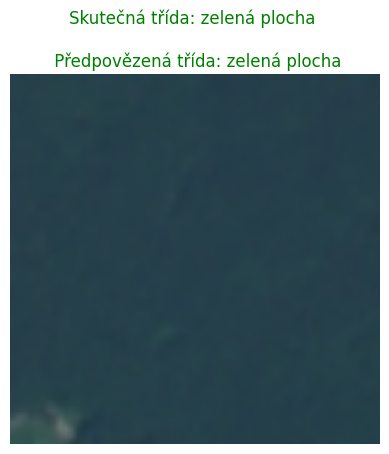

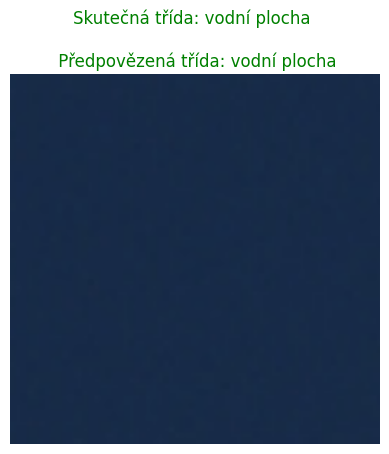

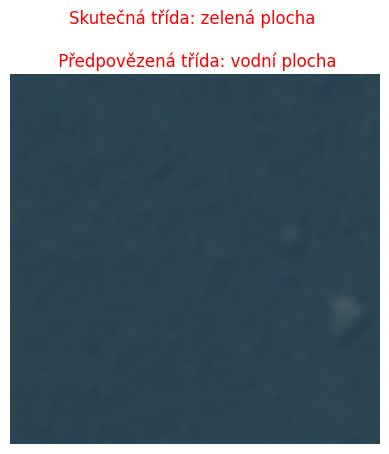

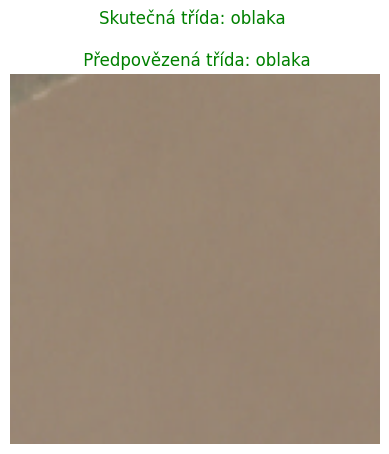

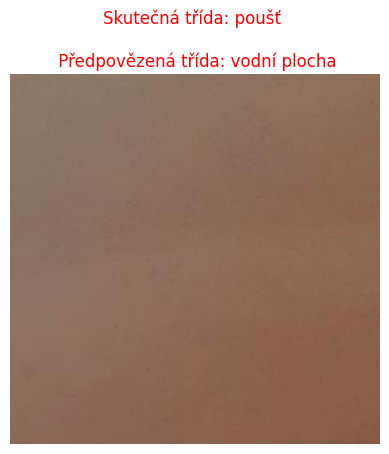

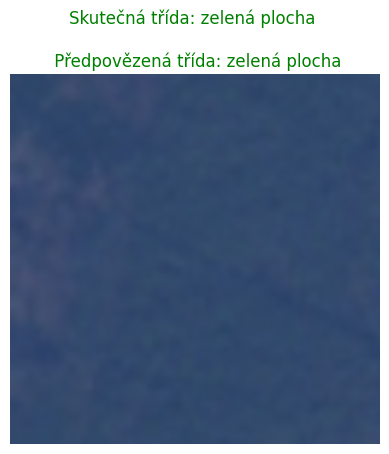

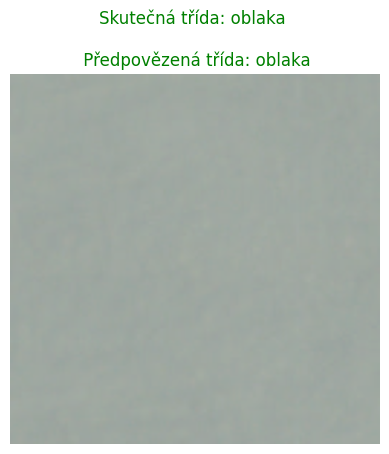

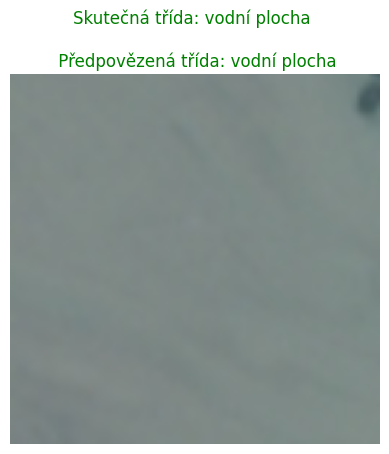

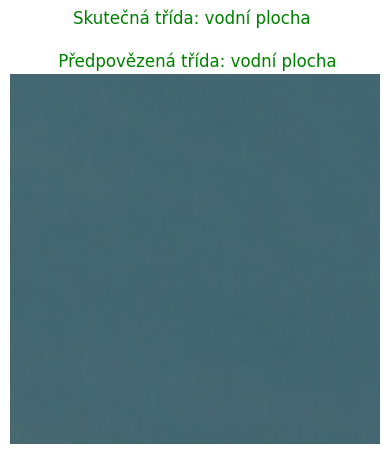

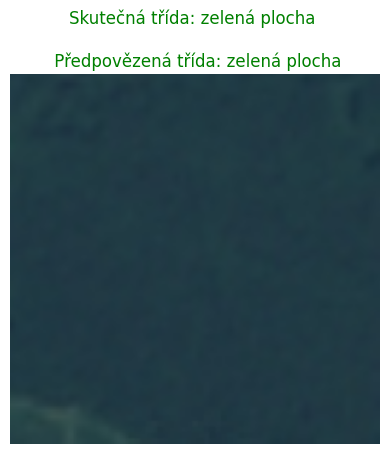

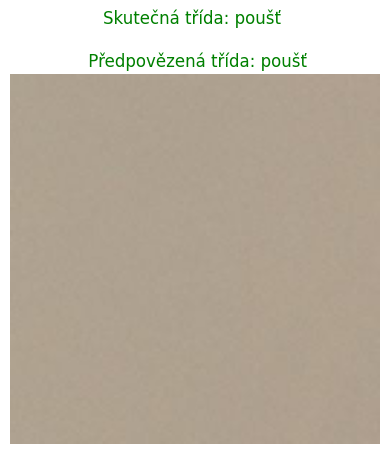

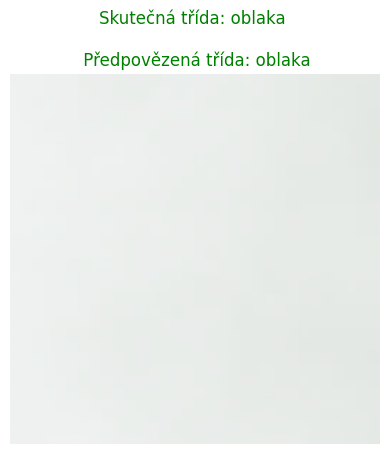

In [ ]:
bfor i, img in enumerate(img_arrays):

    if lbls[i] == preds[i]:
        params = {"text.color" : "green"}
        plt.rcParams.update(params)
    else:
        params = {"text.color" : "red"}
        plt.rcParams.update(params)

    plt.axis('off')
    plt.imshow(img[0, :, :, :])
    plt.title(f'Skutečná třída: {classes[lbls[i]]} \n\n Předpovězená třída: {classes[preds[i]]}')
    plt.show()
    print('\n')
